# Super Store's Data Analysis

In [1]:
## Importing All the necessary things for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import warnings
warnings.filterwarnings('ignore')

## Graph color codes 
palette = ['#970C10', '#BFCAD0']

## Title and axes color
tit_col = "#738580"

In [2]:
## Loading the dataset using pandas
df = pd.read_csv('Data.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
## Let's Get the Data's size
df.shape

(1000, 17)

Well! There are **1000** rows and **17** columns present in the dataset

In [4]:
## Removing Invoice ID column cause it's not useful for the analysis
df.drop(['Invoice ID'], axis = 1, inplace = True)

In [5]:
## Let's get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

In [6]:
# Convert float columns to integer columns
float_columns = ['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income']
df[float_columns] = df[float_columns].astype(int)
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74,7,26,548,1/5/2019,13:08,Ewallet,522,4,26,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15,5,3,80,3/8/2019,10:29,Cash,76,4,3,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46,7,16,340,3/3/2019,13:23,Credit card,324,4,16,7.4
3,A,Yangon,Member,Male,Health and beauty,58,8,23,489,1/27/2019,20:33,Ewallet,465,4,23,8.4
4,A,Yangon,Normal,Male,Sports and travel,86,7,30,634,2/8/2019,10:37,Ewallet,604,4,30,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40,1,2,42,1/29/2019,13:46,Ewallet,40,4,2,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97,10,48,1022,3/2/2019,17:16,Ewallet,973,4,48,4.4
997,A,Yangon,Member,Male,Food and beverages,31,1,1,33,2/9/2019,13:22,Cash,31,4,1,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65,1,3,69,2/22/2019,15:33,Cash,65,4,3,4.1


Well! It's look like everything is in perfect shape

In [7]:
## Checking for any null values in the dataset
df.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

As it clearly seems there is no null values in the data.

#### Since everything is already in perfect shape so we can move formward to Analysis Part.

# Exploratory Data Analysis

## We will First Do analysis on the Branch Data for it's sales and Profit

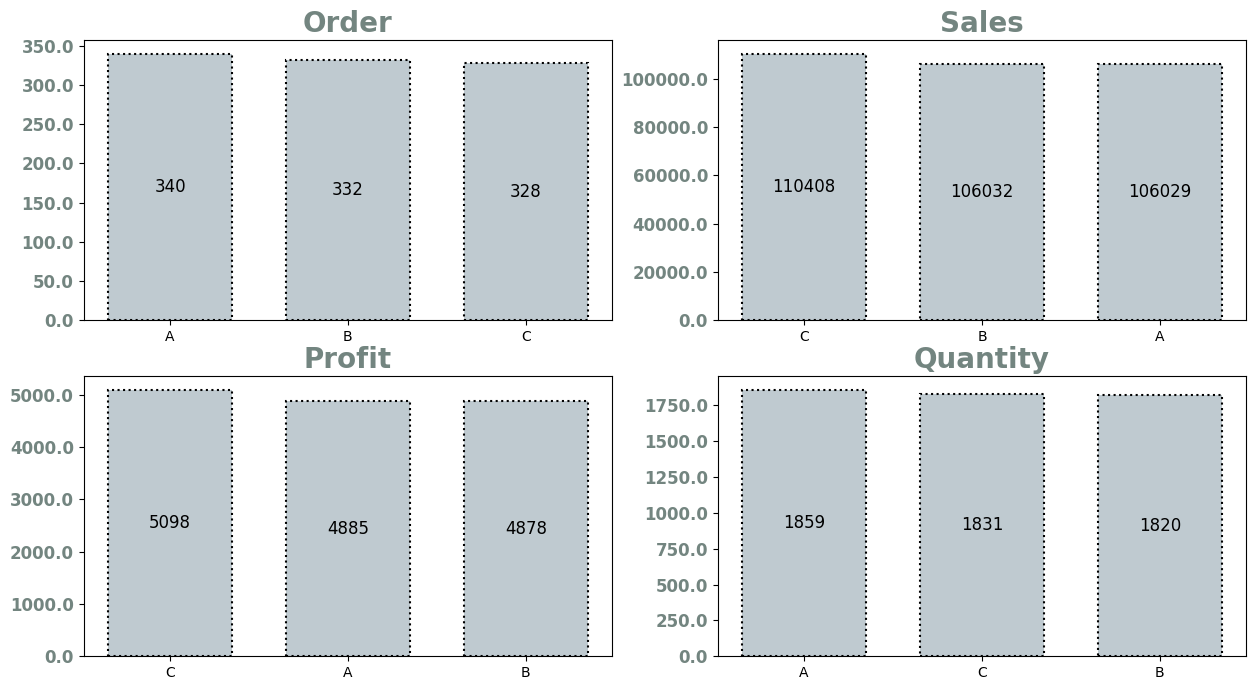

In [58]:
## Adding figure and axes for the analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 8 ))

## Getting Group by data with branch for sales , profit and orders and qty
brnch_count = df['Branch'].value_counts().sort_values(ascending = False)
brnch_sales = df.groupby('Branch').Total.sum().sort_values(ascending = False)
brnch_profit = df.groupby('Branch')['gross income'].sum().sort_values(ascending = False)
brnch_qty = df.groupby('Branch')['Quantity'].sum().sort_values(ascending = False)

## Creating the graph
for ax, data, title in zip((ax1, ax2, ax3, ax4), (brnch_count, brnch_sales, brnch_profit, brnch_qty), ('Order', 'Sales', 'Profit', 'Quantity')):

    ## Creating Bar Graph using matplotlib
    bar = ax.bar(data = data, x = data.index, height= data.values,
                 color = palette[1], width = 0.7, edgecolor = 'k',
                 linewidth = 1.5, linestyle = ':')

    ## Function for converting values into thousands

    
    ## Adding Titles on the charts
    ax.set_title(title, color = tit_col, fontsize = 20, fontweight = 'bold')
    ## Adding y ticks 
    ax.set_yticklabels(ax.get_yticks(), fontsize = 12, fontweight = 'bold', color = tit_col)
    ## Adding Bar labels
    ax.bar_label(bar,  label_type= 'center',  fontsize = 12)


## Insights
* Here In First Chart ( for total orders) we can clearly see that **most of the orders are from A** but it is too that the difference b/w the order is not high, they are alomost the same.
* In the second chart unlike the first chart, **C got the most of the sales** and A is on the last which looks quiet surprising.
* 3rd Chart clearly says that **Profit is mostly from the C Branch** (As expected because of the sales) and B is on the last.
* 4th Chart Says that **mostly quantity is being sold for Branch A** and here again B is on last


## 2- City wise analysis

In [9]:
## chcking the number of unique cities present in the data
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

Well There are only 3 cities in the data

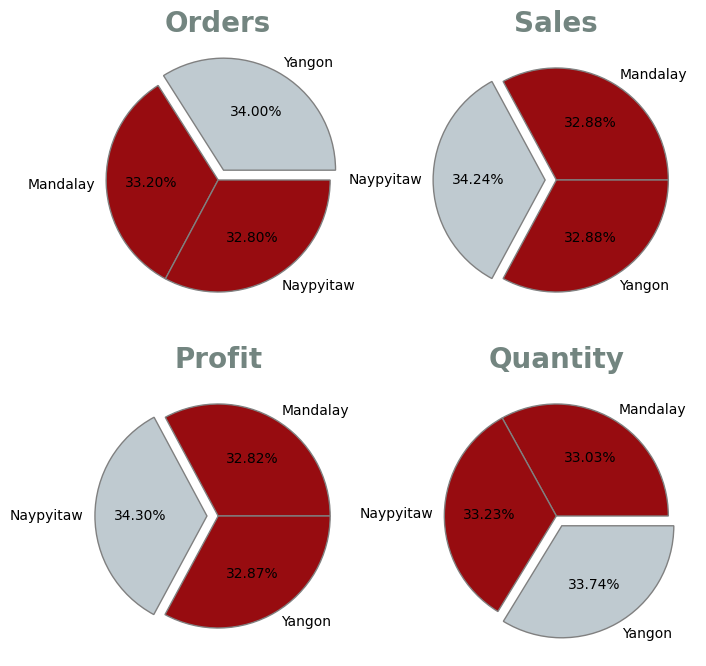

In [10]:
## Making all the data ready for pie chart analysis
order_city = df['City'].value_counts()
sales_city = df.groupby('City').Total.sum()
profit_city = df.groupby('City')['gross income'].sum()
quantity_city = df.groupby('City')['Quantity'].sum()

## Creating figure and axes 
fig , ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (8, 8))

## Iterating every data for the bar chart
for ax , data, title in zip((ax1, ax2, ax3, ax4), (order_city, sales_city, profit_city, quantity_city), ('Orders', 'Sales', 'Profit', 'Quantity')):

    ## To explode the maximum value in the chart
    max_index = data.idxmax()
    explode = [0.1 if i == max_index else 0 for i in data.index]
    color = [palette[1] if i == max_index else palette[0] for i in data.index]

    ## Creating pie chart and sets it's title
    ax.pie(data.values, labels = data.index, autopct='%1.2f%%', explode = explode, colors= color, wedgeprops= {'edgecolor' : 'grey'})
    ax.set_title(title, color = tit_col, fontsize = 20 , fontweight = 'bold')

    


## Insights
* From the first figure it's clear that most of the orders are coming from **Yangon**
* 2nd figure shows that the sales are mostly happening the **Naypyitaw** city around **34 %**
* 3rd figure gives us that most proift is also from **Naypyitaw** (as expected)
* Quantity wise **Yangon** is on top

# 3- Customer Type Analysis

In [11]:
## checking the unique values in customers type
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

There are two type of customers only. So again pie chart for comparision.

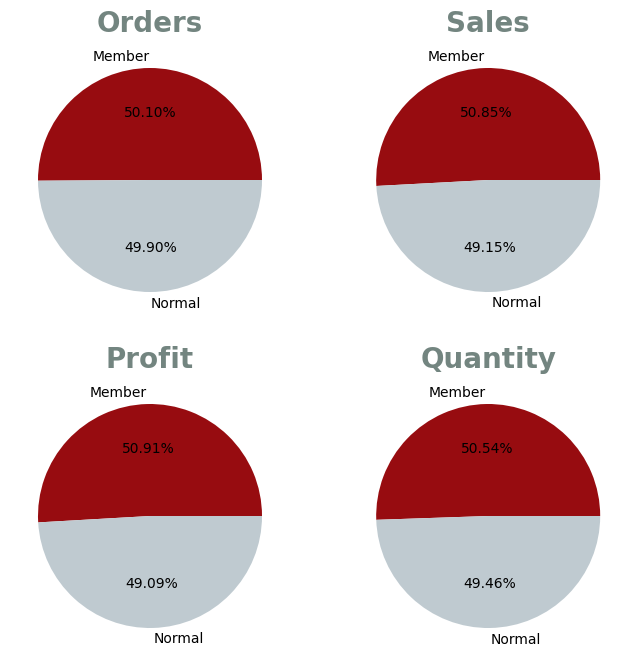

In [12]:
## Creating grouped data for analysis
order_Cust= df['Customer type'].value_counts()
sales_Cust= df.groupby('Customer type').Total.sum()
profit_Cust = df.groupby('Customer type')['gross income'].sum()
quantit_Cust = df.groupby('Customer type')['Quantity'].sum()

## Creating figure and axes 
fig , ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (8, 8))

## Iterating every data for the bar chart
for ax , data, title in zip((ax1, ax2, ax3, ax4), (order_Cust, sales_Cust, profit_Cust, quantit_Cust), ('Orders', 'Sales', 'Profit', 'Quantity')):

    ## Creating pie chart and sets it's title
    ax.pie(data.values, labels = data.index, autopct= '%1.2f%%', colors= palette)
    ax.set_title(title, color = tit_col, fontsize = 20 , fontweight = 'bold')

## Insights
**Insight is obvious. Members are having more sales, profits, orders and even quantity than the Normal customers**

# 4 - Gender Analysis


In [13]:
##  checking the unique values in Gender
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

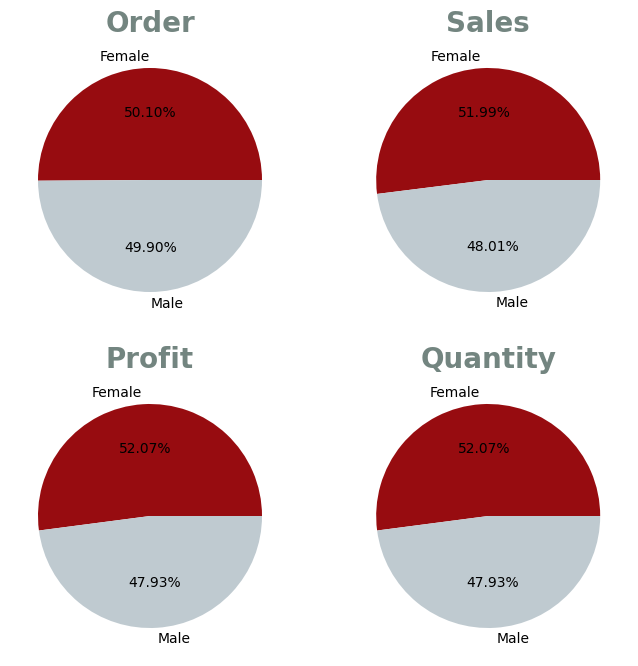

In [14]:
## Creating pie chart for analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (8, 8))
ordr_gndr = df['Gender'].value_counts()
sales_gndr = df.groupby('Gender').Total.sum()
prft_gndr = df.groupby('Gender')['gross income'].sum()
qty_gndr = df.groupby('Gender').Quantity.sum()
for ax, data, titles in zip((ax1, ax2, ax3, ax4), (ordr_gndr, sales_gndr, prft_gndr, qty_gndr), ('Order', 'Sales', 'Profit', 'Quantity')):
    ax.pie(data.values, labels = data.index, colors= palette, autopct = '%1.2f%%')
    ax.set_title(titles, color = tit_col, fontweight = 'bold', fontsize = 20)
    

## Insights 
**Women** buy the most stuff and make the most money for the company, but men also buy things, just not as much."

## 5 -Product Line Analysis

In [15]:
## Getting unique values in Prouduct Line
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

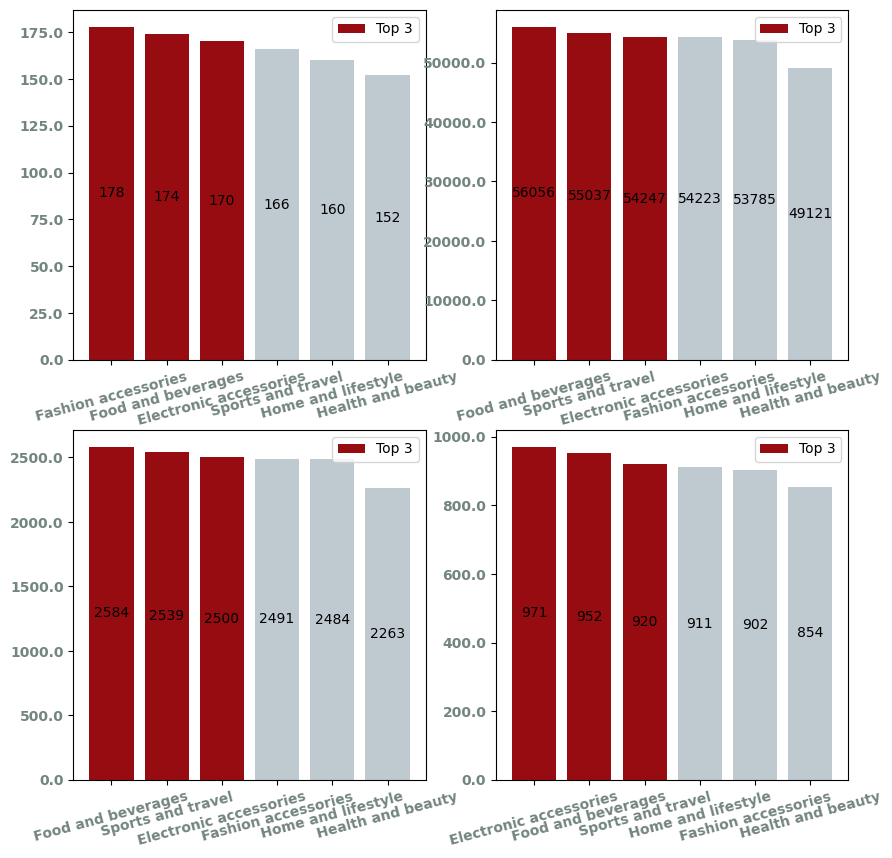

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (10, 10))
## Making the data ready for analysis
ordr_pro = df['Product line'].value_counts().sort_values(ascending = False)
sales_pro = df.groupby('Product line').Total.sum().sort_values(ascending = False)
profit_pro = df.groupby('Product line')['gross income'].sum().sort_values(ascending = False)
qty_pro = df.groupby('Product line')['Quantity'].sum().sort_values(ascending = False)

## Creating bar graph
for ax, data, titles in zip((ax1, ax2, ax3, ax4), (ordr_pro, sales_pro, profit_pro, qty_pro), ('Orders', 'Sales', 'Profit', 'Quantity')):
    color_code = [palette[0] if i in data.values[:3] else palette[1] for i in data]
    bar = ax.bar(data = data, x = data.index, height= data.values, color = color_code)
    ax.bar_label(bar, label_type= 'center')
    ax.set_yticklabels(ax.get_yticks(), color = tit_col, fontweight = 'bold')
    ax.set_xticklabels(labels = data.index, rotation = 15, color = tit_col, fontweight = 'bold')
    ax.legend(['Top 3', 'Below Top 3'])


## Insights 
 Above chart shows that the **Fashion assesories makes the highest frequency of orders** but **sales and profit are highest for Food and beverages** and **Electronics items** are being order in most **quantity**.

# 6 - Analysis On Date

In [17]:
## Let's have an eye on date data
df.Date.unique()

array(['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019',
       '3/25/2019', '2/25/2019', '2/24/2019', '1/10/2019', '2/20/2019',
       '2/6/2019', '3/9/2019', '2/12/2019', '2/7/2019', '3/29/2019',
       '1/15/2019', '3/11/2019', '1/1/2019', '1/21/2019', '3/5/2019',
       '3/15/2019', '2/17/2019', '3/2/2019', '3/22/2019', '3/10/2019',
       '1/25/2019', '1/28/2019', '1/7/2019', '3/23/2019', '1/17/2019',
       '2/2/2019', '3/4/2019', '3/16/2019', '2/27/2019', '2/10/2019',
       '3/19/2019', '2/3/2019', '3/7/2019', '2/28/2019', '3/27/2019',
       '1/20/2019', '3/12/2019', '2/15/2019', '3/6/2019', '2/14/2019',
       '3/13/2019', '1/24/2019', '1/6/2019', '2/11/2019', '1/22/2019',
       '1/13/2019', '1/9/2019', '1/12/2019', '1/26/2019', '1/23/2019',
       '2/23/2019', '1/2/2019', '2/9/2019', '3/26/2019', '3/1/2019',
       '2/1/2019', '3/28/2019', '3/24/2019', '2/5/2019', '1/19/2019',
       '1/16/2019', '1/8/2019', '2/18/2019', '1/18/2019', '2/16/2019',
       '2/22/201

Well There is only one Year (2019) hence the data is of only 2019 so extracting the year is unnecessary. We won't do any analysis on year (it means).

In [19]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
## Now replacing month names
df['Month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace = True)

In [20]:
## Checking is values are replaced or not??
df['Month'].unique()

array(['Jan', 'Mar', 'Feb'], dtype=object)

**Bravo!** Valeus are replaced sucessfully

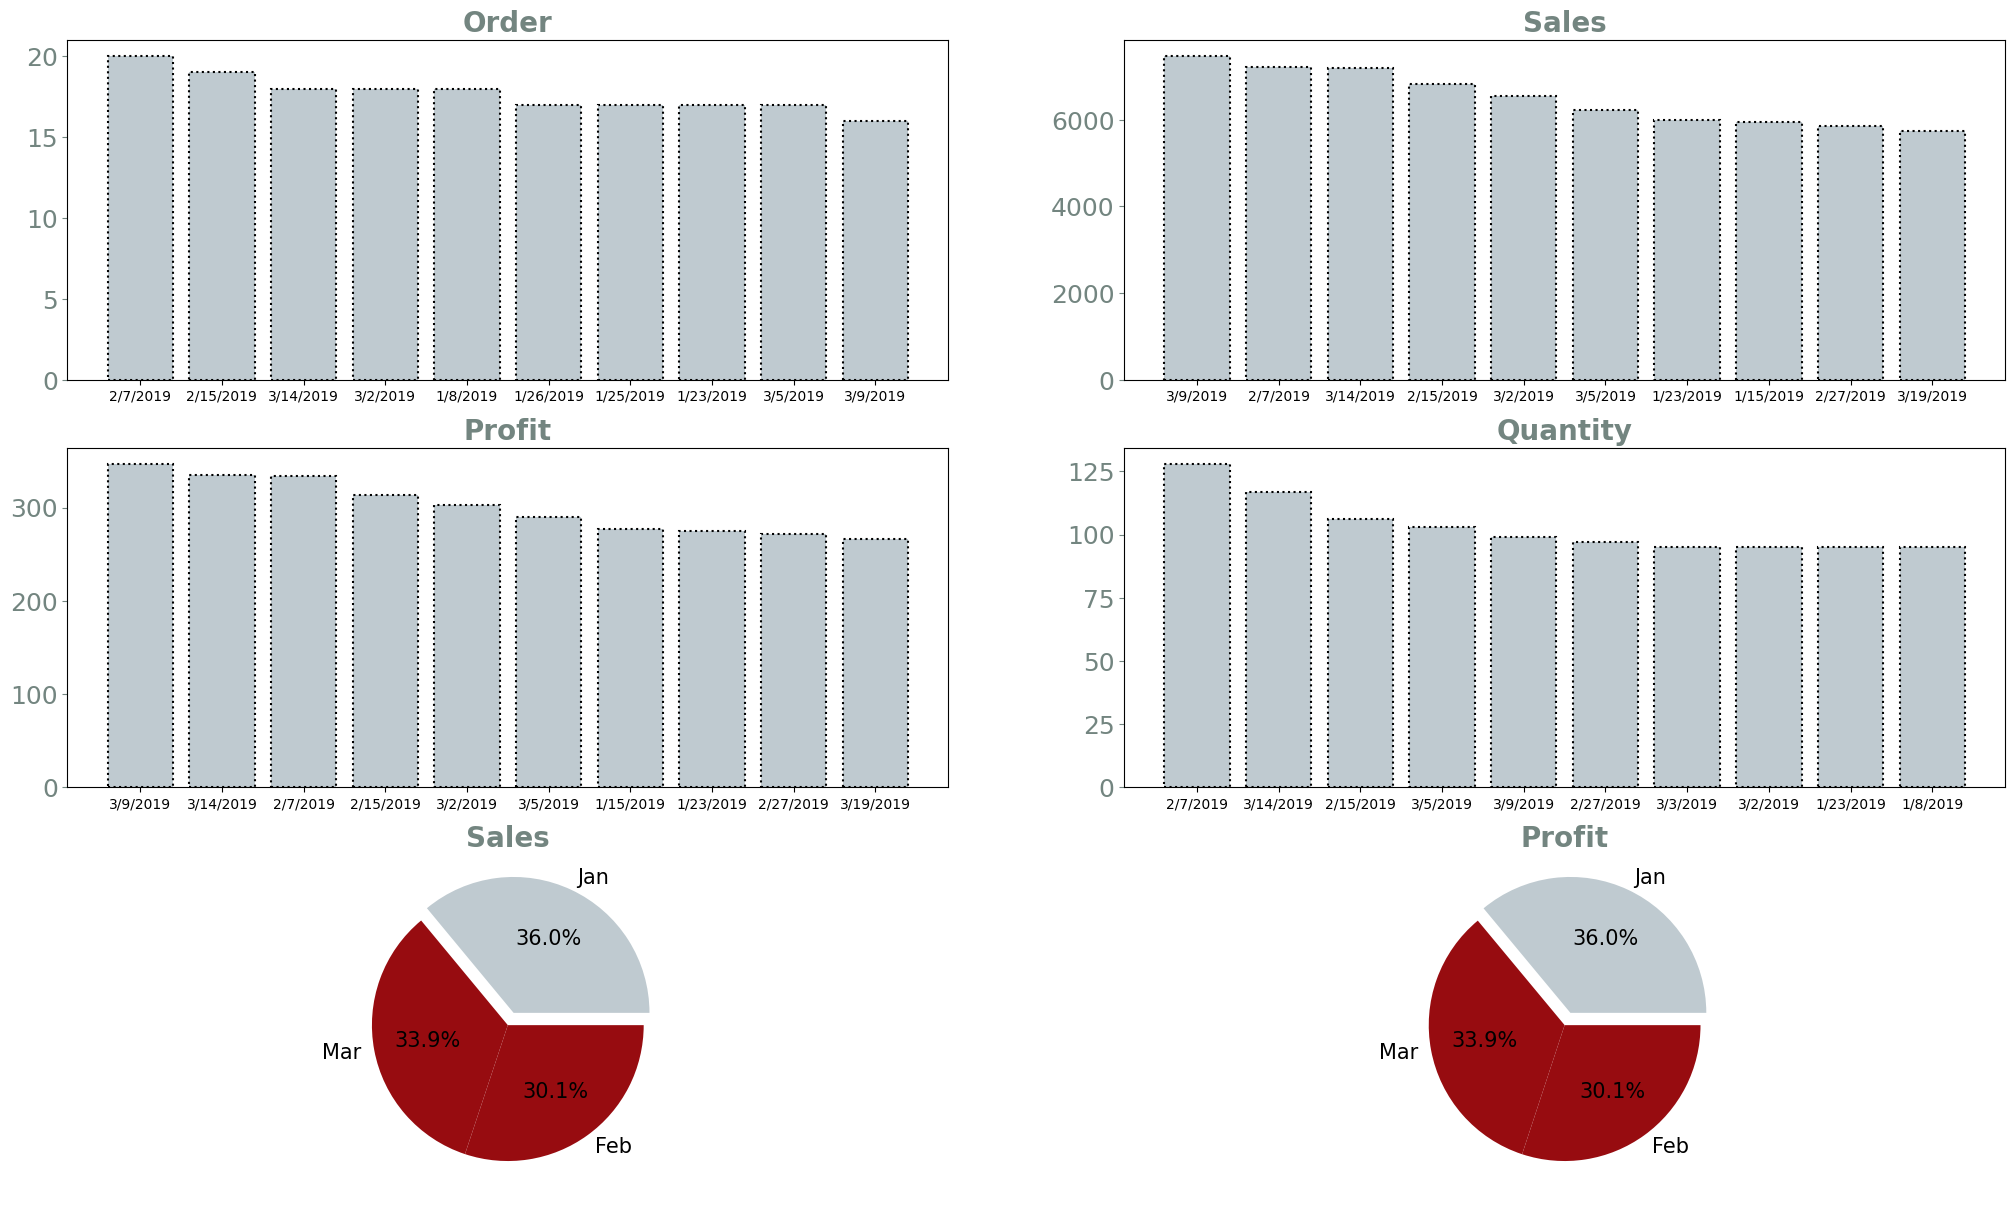

In [21]:
## Creating chart for analysis
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (25, 15))

## Making data ready for the analysis
date_ord = df['Date'].value_counts().sort_values(ascending = False).head(10)
date_sales = df.groupby('Date').Total.sum().sort_values(ascending = False).head(10)
date_profit = df.groupby('Date')['gross income'].sum().sort_values(ascending = False).head(10)
date_qty = df.groupby('Date')['Quantity'].sum().sort_values(ascending = False).head(10)
month_sales = df.groupby('Month').Total.sum().sort_values(ascending = False)
month_profit = df.groupby('Month')['gross income'].sum().sort_values(ascending = False)

## creating bar chart for each category
for ax, data, title in zip((ax1, ax2, ax3, ax4, ax5, ax6), (date_ord, date_sales, date_profit, date_qty, month_sales, month_profit), 
                    ('Order', 'Sales', 'Profit', 'Quantity', 'Sales', 'Profit')):

## Adding conditions so that if it is for date then create bar chart other wise (for month) create pie chart
    if ax in (ax1, ax2, ax3, ax4):
        ax.bar(data = data, x = data.index, height = data.values, color = palette[1], edgecolor = 'k', linewidth = 1.5, linestyle = ':')
    else:
## For identifying and exploding the maximum value portion from the pie chart
        max_index = data.idxmax()
        exp = [0.1 if i == max_index else 0 for i in data.index]
        color_code = [palette[1] if i == max_index else palette[0] for i in data.index]
        ax.pie(data.values, labels =  data.index, explode= exp, colors= color_code, autopct = "%1.1f%%", textprops= {'fontsize': 15})
## Adding Titles and customzing axes
    ax.set_title(title, fontsize = 20, fontweight = 'bold', color = tit_col)
    ax.tick_params(axis = 'y', colors = tit_col, labelsize = 18)

# 7 - Analyzing Payment method

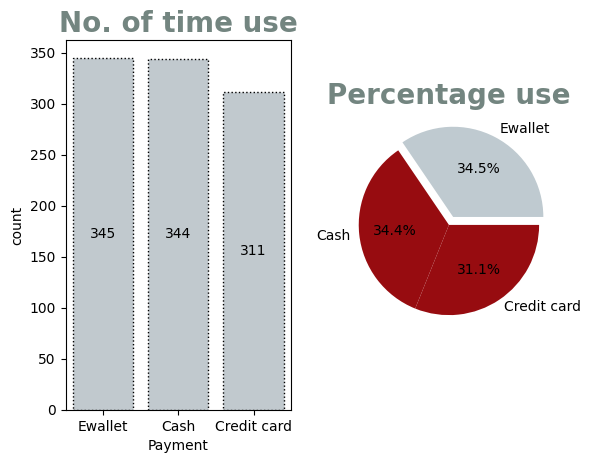

In [56]:
## Checking the number of times of usement for different payment method
fig, (ax1, ax2) = plt.subplots(1, 2)
pay_percent = df.Payment.value_counts()    ## for pie chart

## Creating Pie chart
for ax, data, titles in zip((ax1, ax2),(df, pay_percent),  ('No. of time use', 'Percentage use')):

## Adding condition for different different charts
    if ax == ax1:
        bar = sns.countplot(data = data, x = 'Payment', ax = ax, color = palette[1], edgecolor = 'k', linestyle = ':', linewidth = 1)
        for x in bar.containers:
            bar.bar_label(x, label_type= 'center')
    else:
        exp = [0.1 if i == data.idxmax() else 0 for i in data.index]
        col = [palette[1] if i == data.idxmax() else palette[0] for i in data.index]
        ax.pie(data.values, labels = data.index, explode= exp, colors= col, autopct = "%1.1f%%")
        
## Adding Titles on the chart
    ax.set_title(titles, fontsize = 20, fontweight = 'bold', color = tit_col)


# Insights
 Clearly we can see from the above graphs that **Most of the peoples use Ewallet** as for their transactions but the difference b/w credit card, cash and Ewallet is almost the same so we can't say any any specific method is used mostly because all may be just because of the data available.